In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import partial_dependence as pdp_plot

In [2]:
#read the data
df = pd.read_csv('winequality-red.csv')

#convert the target variable to a string
df['quality'] = df['quality'].astype(str)

#separate the target variable from the data
Y = df.pop('quality')
X = df

#separate the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

#create a model
rf = RandomForestClassifier()

#train the model
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3]:
#create a list of class labels
class_labels = list(rf.classes_)

In [4]:
#create a pdp objects
pdp = pdp_plot.PartialDependence(xtest, rf, class_labels, class_labels[2]) 

In [5]:
#create a list of columns for which to show the 1D partial dependence plots.
mycols = list(xtest.columns)

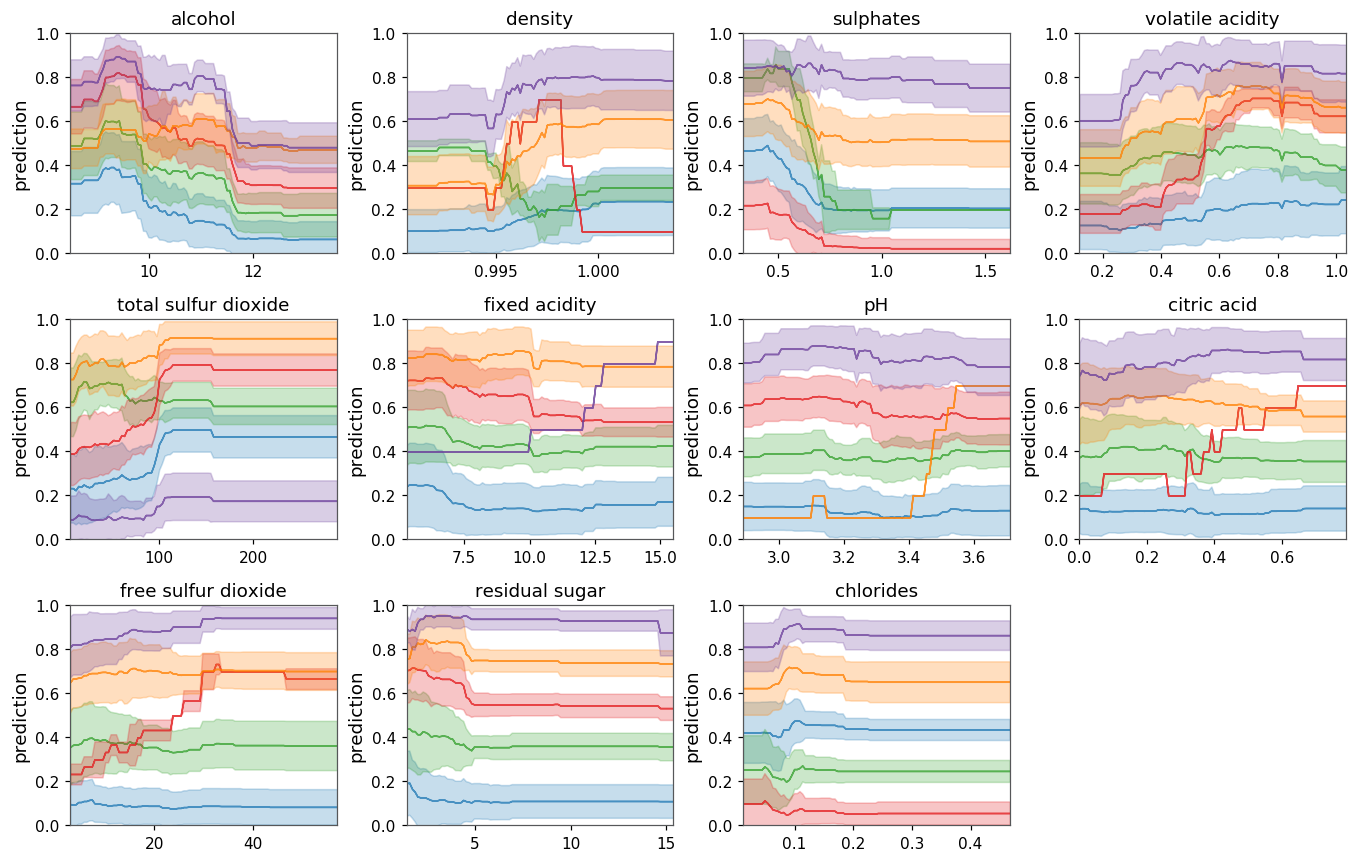

In [6]:
#show the plot for multiple varaibles
pdp.plot_multiple(mycols, compute_clusters=True, n_clusters=5)

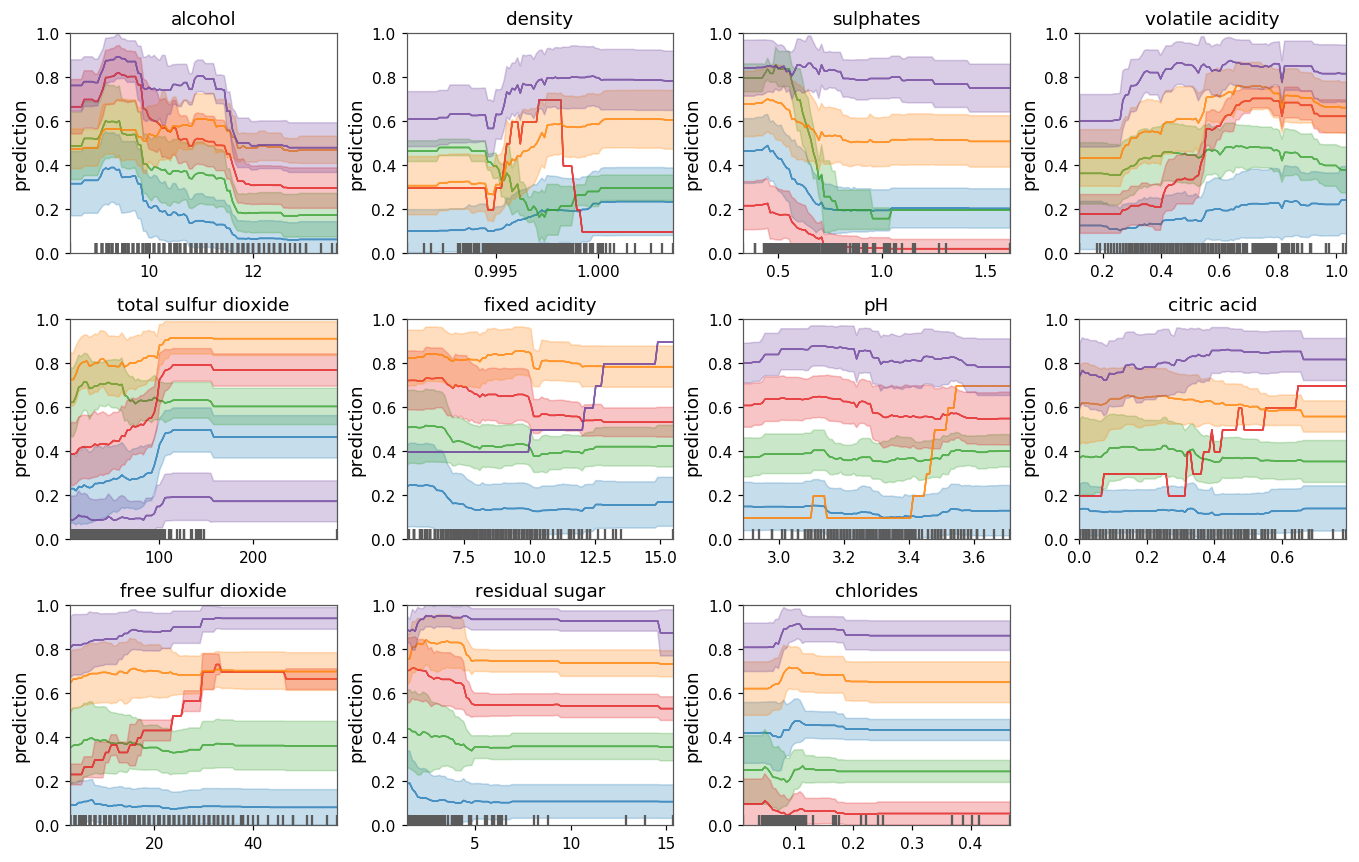

In [7]:
#it is also possible to see the distribution of each of the variables
pdp.plot_multiple(mycols, compute_clusters=True, n_clusters=5, rug=True, data=xtest)

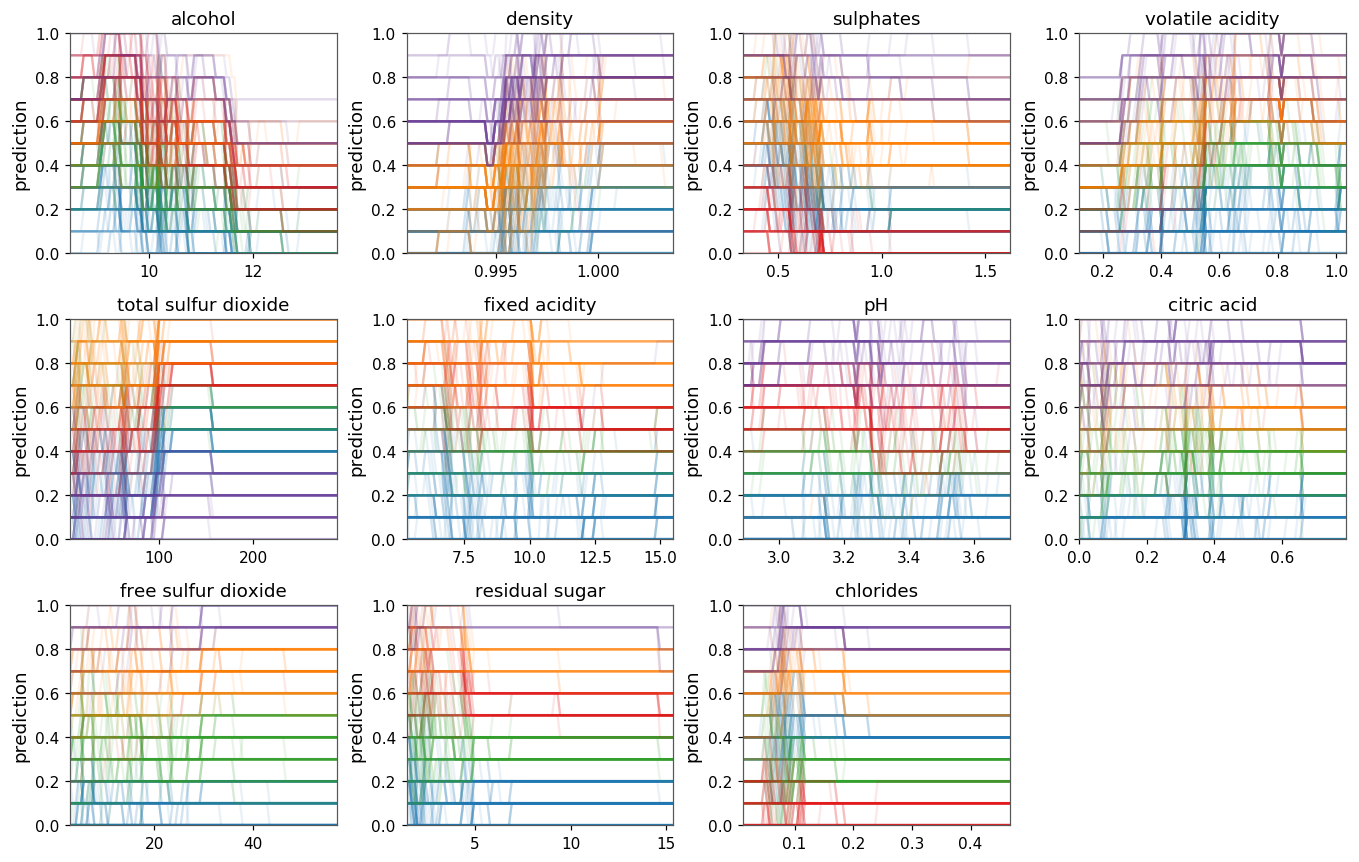

In [8]:
#each individual curve in the plot can be viewed
pdp.plot_multiple(mycols, compute_clusters=True, n_clusters=5, plot_full_curves=True)

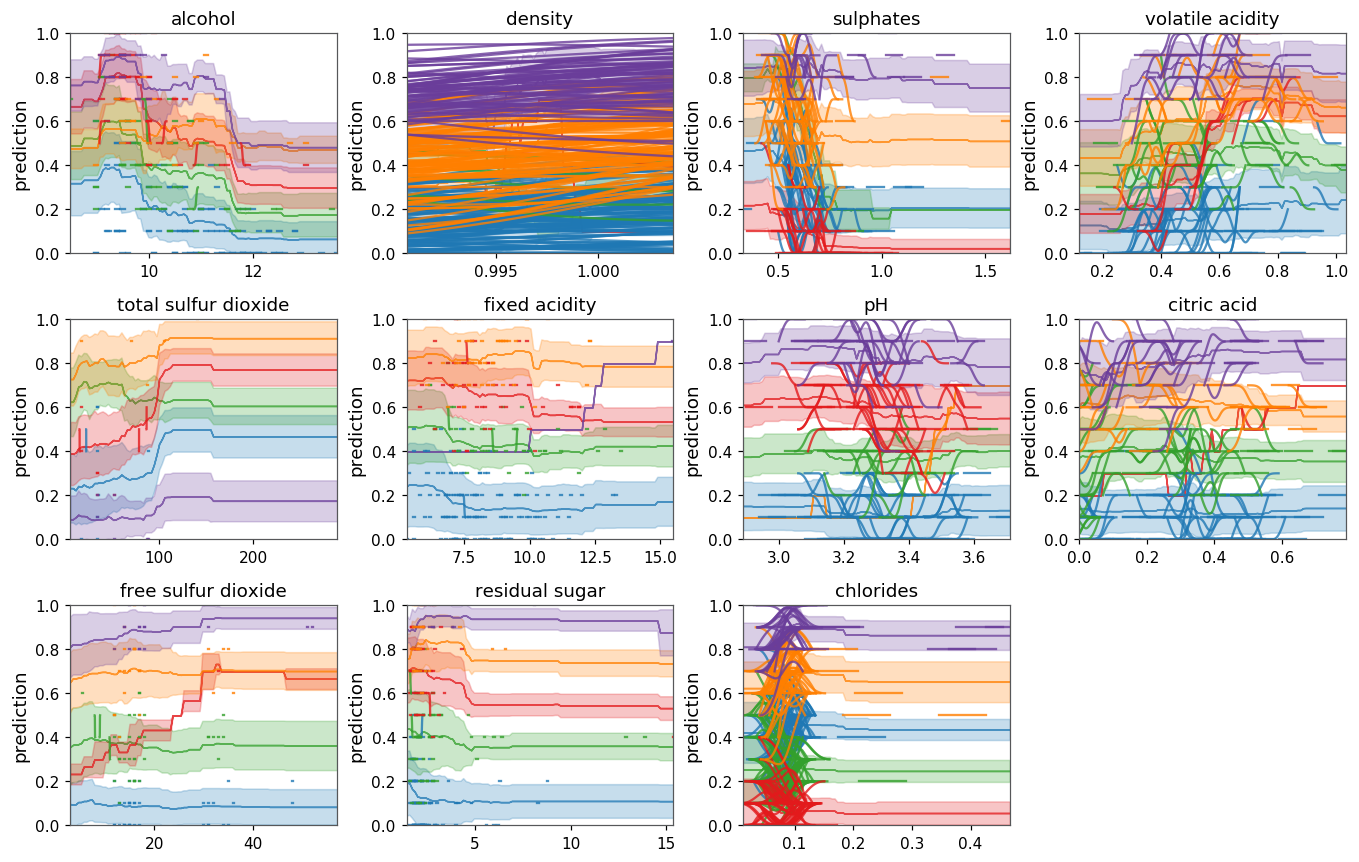

In [12]:
#it is also possible to plot the local curves
pdp.plot_multiple(mycols, compute_clusters=True, n_clusters=5, local_curves=True)

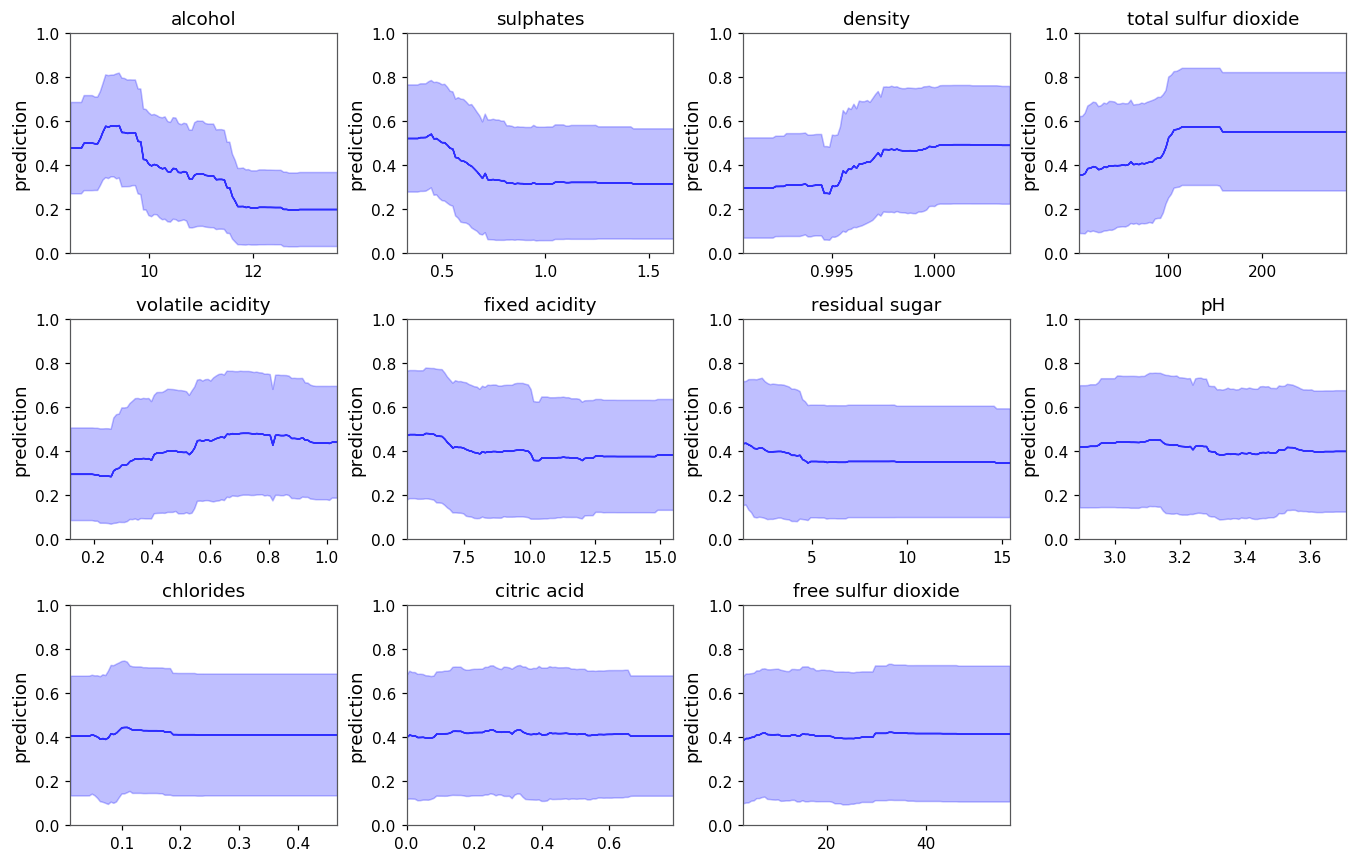

In [9]:
#it is also possible to see the board curves
pdp.plot_multiple(mycols)